## 业务背景
### 用户对GPU的存在以及对运算加速的效果产生了质疑

In [24]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [25]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [27]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import sys
import tensorflow as tf
from datetime import datetime
 

## 通过对随机大矩阵的内积以及求和，10000*10000
### 测试GPU速度

In [28]:
shape = (10000, 10000)

device_name = "/gpu:0"
with tf.device(device_name):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)
 
startTime = datetime.now()
with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)
        
print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5

250004540000.0
Shape: (10000, 10000) Device: /gpu:0
Time taken: 0:00:00.506390


### 测试CPU速度

In [29]:
shape = (10000, 10000)

device_name = "/cpu:0"
with tf.device(device_name):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)
 
startTime = datetime.now()
with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)
        
print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5

249990000000.0
Shape: (10000, 10000) Device: /cpu:0
Time taken: 0:00:07.065712


### 写一个完整的代码来进行测试

In [44]:
shape_index = [10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]#, 50000, 100000]
gpu_time = []
cpu_time = []

for i in shape_index:
    print("shape is %d"%i)
    shape = (i, i)
    
    device_name = "/gpu:0"
    with tf.device(device_name):
        random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
        dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
        sum_operation = tf.reduce_sum(dot_operation)

    startTime = datetime.now()
    with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
            result = session.run(sum_operation)
    
    gpu_time.append((datetime.now() - startTime).seconds)
    
    device_name = "/cpu:0"
    with tf.device(device_name):
        random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
        dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
        sum_operation = tf.reduce_sum(dot_operation)

    startTime = datetime.now()
    with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
            result = session.run(sum_operation)
    
    cpu_time.append((datetime.now() - startTime).seconds)

shape is 10
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5

shape is 50
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:loca

No handles with labels found to put in legend.


NameError: name 'x' is not defined

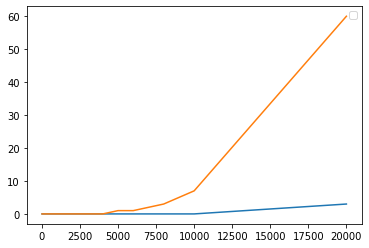

In [45]:
# !pip install matplotlib
import matplotlib.pyplot as plt    
plt.plot(shape_index, gpu_time)
plt.plot(shape_index, cpu_time)
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("shape") #X轴标签
plt.ylabel("cost_time / sec") #Y轴标签
plt.title("GPU TEST") #标题

plt.show()